## **Pricing Model**

We use a one factor pricing model for oil prices. 
We assume that the log price follows an Ornstein-Ulenbeck process.

BENEFITS FOR CALIBRATION AND APPLICATION OF THE MODEL:
1. One factor leads to a closed form solution;
2. Linear relationship between the log-future prices and the underlying factors.

Define:
$S = price$ and 
$X = ln(S)$, then, under the probability measure ℙ, X follows an OU process:

\begin{align}
\tag{1}
dX = k(α-X)dt + σdW 
\end{align}

where k is the speed of mean reversion and $α = -σ^2/2k$ is the long-run mean of the log price.

Under the risk-neutral probability ℚ the model assumes the form

\begin{align}
\tag{2}
dX_t = k(α^*-X_t)dt + σdW_t^*
\end{align}


# where $α^* = α - λ$, λ is the market price of risk and $dW^* = $ is again a Brownian Motion (Girsanov's theorem).
(insert explanation for alpha star and dwstar)
To solve Equation (2) we multiply it by the integrating factor $e^{kt}$:

\begin{align}
𝑒^{kt}dX_t + 𝑒^{kt}kX_tdt = 𝑒^{kt}(kα^* + σdW^*_t) \nonumber \\
d(𝑒^{kt}X_t) = 𝑒^{kt}(kα^* + σdW^*_t)  \nonumber \\
\int^{T}_{0} d(𝑒^{ks}X_s) = α^*\int^{T}_{0}k𝑒^{ks}ds + σ\int^{T}_{0}𝑒^{ks}dW^*_s  \nonumber \\
𝑒^{kT}X_{T} + X_0 = α^*(𝑒^{kT} - 1) + σ\int^{T}_{0}𝑒^{ks}dW^*_s  \nonumber \\ \tag{3}
X_{T} = 𝑒^{-kT}X_{0} + α^*(1- 𝑒^{-kT}) + σ\int^{T}_{0}𝑒^{k(s-T)}dW^*_s   \nonumber \\ 
\end{align}

From Equation (3) we can obtain the mean and the variance of the process $X_T$, knowing that $VAR(dW^*_t) = dt$ based on the Brownian Motion quadratic variation:

\begin{align}
𝔼_{ℚ}(X_T) = 𝑒^{-kT}X_{0} + α^*(1- 𝑒^{-kT})  \nonumber \tag{4} \\
VAR(X_T) = σ^2𝑒^{-2kT}\int^{T}_{0}𝑒^{2ks}dt = \frac{σ^2}{2k}(1-𝑒^{-2kT}) \tag{5} \\
\end{align}

We note that $VAR(X_T) < \frac{σ^2}{2k}$ since $k>0$.
Then, the futures prices at T is equal to the expected price of the underlying at T, namely: 

\begin{align}
F(S, T) = 𝔼(S_T) \tag{6}
\end{align}

and since S_t follows the log-normal distribution

\begin{align}
F(S, T) = exp(𝔼_{ℚ}(X_T) + \frac{1}{2}VAR(X_T)) \tag{7} \\
lnF(S, T) = 𝑒^{-kT}X_{0} + α^*(1- 𝑒^{-kT}) + \frac{σ^2}{4k}(1-𝑒^{-2kT}) \tag{8}
\end{align}

## Kalman Filter
Via the Kalman Filter (), the true state equation of an unobserved process

\begin{align}
x_{t+1} = Φx_{t} + u_{t} \tag{9}
\end{align}

can be described through a measurement equation of the observed state

\begin{align}
z_{t} = Hx_{t} + v_{t} \tag{10},
\end{align}

where $x_t$ is the state vector at time t, $Φ$ is the transition matrix of the process x from the state at t to the state at t+1, $z_{t}$ is the actual mesurement of x at time t, H connects the state vector $x_t$ to the measurement vector $z_t$ and, lastly, $u_t$ and $v_t$ are white noises with known covariance that are assumed stationary over time and given by 

\begin{align}
Q = 𝔼(u_tu_t^T) \tag{11} \\
R = 𝔼(v_tv_t^T) \tag{12}
\end{align}

We define the error covariance matrix at time t as the mean squared error between the actual and the predicted state value

\begin{align}
P_t = 𝔼(e_te_t^T) = 𝔼[(x_t - x̂_t)(x_t - x̂_t)^T] \tag{13}
\end{align}

Assuming that the prior estimation of $x̂_t$ is called $x̂^1_t$ and was obtained by previous knowledge of the system, it is possible to write an update equation for the new estimate:

\begin{align}
x̂_t = x̂^1_t + K_t(z_t - Hx̂^1_t) = x̂^1_t + K_ti_t \tag{14}
\end{align}

where $K_t$ is the Kalman gain. Substituting Eq(10) and Eq(14) into Eq(13) gives

\begin{align}
P_t = (I - K_tH)P^1_t(I-K_tH)^T + K_tRK_t^T \tag{15}
\end{align}

where $P^1_t$ is the previous estimate of $P_t$ and R is defined in Eq(12). Eq(15) is the error covariance update equation. the diagonal of the covariance matrix $P_{kk}$ contains the MSEs $𝔼[e_{t-1}e_{t-1}^T], 𝔼[e_{t}e_{t}^T]$ and $𝔼[e_{t+1}e_{t+1}^T]$. Thus the MSE can be minimized by minimizing the trace of $P_t$ which in turns minimises the trace of $P_{tt}$. Note that Tr(A) = Tr(A^T) so

\begin{align}
Tr(P_t) = Tr[P^1_t] - 2Tr[K_tHP^1_t] + Tr[K_t(HP^1_tH^T + R)K_t^T] \tag{16}
\end{align}

Differentiating Eq(16) with respect to $K_t$ we get

\begin{align}
\frac{dTr(P_t)}{dK_t} = - 2[HP^1_t] + 2[K_t(HP^1_tH^T + R)] \tag{17}
\end{align}

setting equal to zero and solving for $K_t$ gives

\begin{align}
K_t = P^1_tH^T(HP^1_tH^T + R)^{-1} \tag{18}
\end{align}

which is the Kalman Gain Equation. We can further define 

\begin{align}
S_k = HP^1_tH^T + R \tag{19}
\end{align}

as the measurement prediction covariance of the innovation $i_k$ from Eq(14). Lastly, $P_t$ can be simplified as 

\begin{align}
P_t = (I - K_tH)P^1_t \tag{20}
\end{align}

Eq (14), Eq (15) and Eq (18) develop an estimate for the variable $X_t$. The estimate at the next time step is obtained as 

\begin{align}
x̂^1_{t+1} = Φx̂_t \tag{21}
\end{align}

Now, to project the error covariance matrix into the next time interval t+1 we define the prior error

\begin{align}
e^1_{t+1} = x_{t+1} - x̂_{t+1} = (Φx_t + u_t) + Φx̂_t = Φe_t + u_t \tag{22} \\
P^1_{t+1} = 𝔼[e^1_{t+1}e^{1T}_{t+1}] = 𝔼[Φe_t(Φe_t)^T] + 𝔼[u_tu^T_t] = ΦP_t\Phi + Q \tag{23}
\end{align}

The recursive methodology works as follows: 
1. Given an initial estimate $x_0$ the Kalman gain $K_t$ from Eq(18) is computed;
2. The estimate $x̂_t$ is updated folling Eq(14);
3. The error covariance matrix $P_t$ is updated as of Eq(20);
4. Lastly, $x̂_t$ and $P_t$ are used to project into time t+1 following Eq(21) and Eq(23).


|Summary||
|-------------------|---|
| Kalman Gain       | $K_t = P^1_tH^T(HP^1_tH^T + R)^{-1}$  |  
| Update Estimate   | $x̂_t = x̂^1_t + K_t(z_t - Hx̂^1_t) $  | 
| Update Covariance | $P_t = (I - K_tH)P^1_t$  |  
| Project $x̂$ into t+1  | $x_{t+1} = Φx_{t} + u_{t}$  |  
| Project $P^1$ into t+1  | $P^1_{t+1} = ΦP_t\Phi + Q$  | 

## Calibration

I defined:

1. The *unobservable state equation* as the discretization of Eq(2)

   \begin{align}
    X_t = c_t + Φ_tX_{t-1} + u_t,  \quad   t = 1,...,T \tag{24}
   \end{align}

   where 

\begin{align}
    c_t &= kαΔt \\
    Φ_t &= 1-kΔt \\
    u_t & \sim \mathcal{N}(0,1)
   \end{align}

1. the *measurement equation* as 
   
   \begin{align}
   z_{t} = H_tX_{t} + d_t + v_{t} ,  \quad   t = 1,...,T  \tag{25}
   \end{align}

    where

\begin{align}
    z_{t} & = ln(F(T_i)), \quad i=1,...,N (Nx1)  \\
    d_t & = α^*(1- 𝑒^{-kT_i}) + \frac{σ^2}{4k}(1-𝑒^{-2kT_i}), \quad i=1,...,N \\
    H_t & = 𝑒^{-kT_i}, \quad i=1,...,N\\
    v_t & ∼ \mathcal{N}(0,1) 
   \end{align}

To calibrate the model via Kalman Filter I used 10 maturities (from 1 to 10 months ahead) of WTI Futures prices ranging between 04/01/2021 and 29/12/2023. The data choice is due to the fact that commodity prices are often not observable and easily manipulated by market participants. Contrarily, Futures are traded through an exchange and their prices are readily available.
The calibration is run via the Python Pykalman package, the parameters obtained are used to maximise the log-likelihood of the observed measurements.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import os
from pykalman import KalmanFilter
import pylab as pl
import scipy
from pykalman.sqrt import CholeskyKalmanFilter

In [3]:
# Load Close prices
df = pd.read_csv("WTI-Future.csv", index_col = "Date")

# Compute the log of future prices and add index column
df = np.log(df).reset_index()

# Drop Date column
X = df.drop(columns = "Date").astype(float)

In [4]:
X.head()

,CLH25,CLJ25,CLK25,CLM25,CLN25,CLQ25,CLU25,CLV25,CLX25,CLZ25
0,3.798630,3.797734,3.797734,3.796837,3.796612,3.795939,3.795714,3.795939,3.796163,3.797061
1,3.800868,3.799526,3.799302,3.798182,3.797510,3.796612,3.795939,3.795939,3.795714,3.796388
2,3.793690,3.792113,3.791887,3.790533,3.789855,3.788951,3.788046,3.788046,3.787819,3.788499
3,3.804660,3.803101,3.802878,3.801538,3.800868,3.799974,3.799302,3.799302,3.799078,3.799750
4,3.813969,3.812424,3.811982,3.810655,3.809990,3.808882,3.808217,3.807995,3.807773,3.808217


# Optimize for k and sigma

In [5]:
# set k and sigma small starting values
k = 0.0000000001#0.0000000000001
sigma = 0.0000000001#0.0000000000001
x = k, sigma
# Maturities in months
T = np.arange(1, 11,1)

In [6]:
# Define measurement equation as objective function 

def measurement(x):
    # x=(k,sigma)
    k = x[0] # assignto ke the first value
    sigma = x[1]
    phi = np.eye(1)*(1-k) # transition matrix from xt+1 = phixt + ut # phi.shape => (1,1)
    H = np.exp(-k*T) # observation matrix from zt = Hxt + vt
    H = H[:, None] # reshape from 1x10 to 10x1
    transition_cov = (sigma**2)*np.eye(1) # should be u_t  1x1
    observation_cov = 0.001*np.eye(len(T)) # should be v_t  10x10
    kf = KalmanFilter(transition_matrices= phi, 
                      observation_matrices=H, 
                      transition_covariance=transition_cov, 
                      observation_covariance=observation_cov)
    lk = kf.loglikelihood(X)
    
    #return negative log likelihood since we are maximising
    return -lk
    


In [7]:
import scipy.optimize
param = np.array([k, sigma])
kf1 = scipy.optimize.minimize(measurement, param, method = "TNC") # TNC = Truncated Newton Algorithm
kf1

 message: Linear search failed
 success: False
  status: 4
     fun: -18312.34441392255
       x: [ 7.535e-04  1.154e-02]
     nit: 13
     jac: [ 7.312e-01  1.201e-02]
    nfev: 144

In [8]:
param

array([1.e-10, 1.e-10])

In [26]:
kf1.x[1]

0.01153658448414554

In [10]:
# Test results and plot
# Use the previous estimates as initial values
kf_k = kf1.x[0]
kf_sigma = kf1.x[1]

phi = np.eye(1)*(1-kf_k)
H = np.exp(-kf_k*T)
H = H[:, None]

trans_cov = (kf_sigma**2)*np.eye(1)
obs_cov = (0.001*np.eye(len(T)))

In [11]:
kf = KalmanFilter(transition_matrices=phi,
                  observation_matrices=H,
                  transition_covariance=trans_cov,
                  observation_covariance=obs_cov)

In [12]:
# X is our observed values
filtered_state_estimates = kf.filter(X)[0]
smoothed_state_estimate = kf.smooth(X)[0]

Text(0, 0.5, 'state')

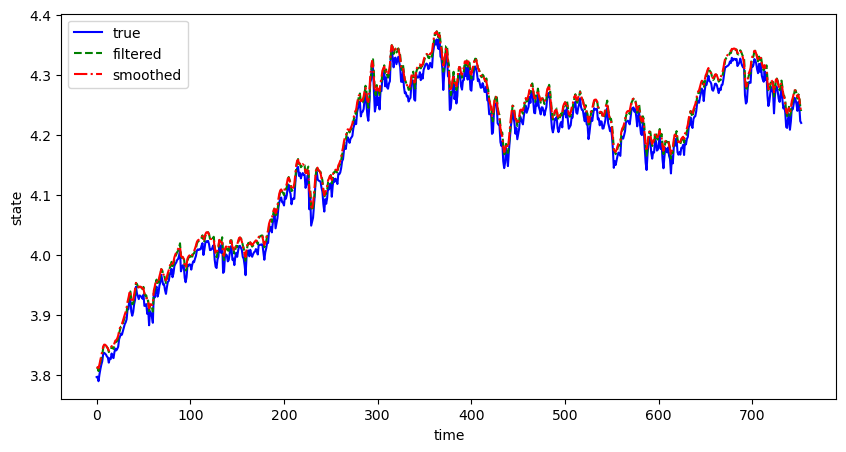

In [13]:
pl.figure(figsize=(10, 5))
lines_true = pl.plot(X.mean(axis = 1), linestyle = "-", color = "b")
lines_filt = pl.plot(filtered_state_estimates, linestyle = "--", color = "g")
lines_smooth = pl.plot(smoothed_state_estimate, linestyle = "-.", color = "r")
pl.legend( (lines_true[0], lines_filt[0], lines_smooth[0]), ("true", "filtered", "smoothed"))
pl.xlabel("time")
pl.ylabel("state")

## Pricing model

Simulate 10000 scenarios using Monte Carlo.
Number of timesteps = 254

In [ ]:
# Set K and SIGMA from the Kalman Filter optimization
K = kf1.x[0]
SIGMA = kf1.x[1]

t_0 = 1
t_end = 254
length = 254
# Compute alpha^* as alpha-lambda where lambda = risk free rate 0.65% = 0.0065 
alpha = -(sigma**2)/(2*k) - 0.0065


# Compute time axis, assign to dt the step size

t, dt= np.linspace(0, 1, 254, retstep=True)

# starting price value
y0 = X["CLH25"].iloc[-1] # Log of last value observed for CLH25

# number of simulations
I = 10000

In [ ]:
# Function that computes an array of length = length (254) of randomly generated SIGMA*sqrt(dt)*Z, Z~N(0,1)
def bm_simulator(dt, SIG):
    #sqrt_dt_sigma = np.sqrt(dt*SIG)
    #return np.random.normal(loc = 0, scale = sqrt_dt_sigma, size = length)
    ''' Corrected the scale term as Ezio only used dt*SIGMA instead of using the solution to the BM integral'''
    sqrt_dt_sigma= np.sqrt((SIG**2)/(2*K) * (1 - np.exp(-2*K*dt)))
    return np.random.normal(loc = 0, scale = sqrt_dt_sigma, size = length)

In [81]:
# Generates I paths. Each path is a list of 254 elements.
def ou(length, k, alpha, t, dt, SIG):
    # Set paths[0] = starting value
    paths = [y0]
    # Generate brownian motion term array
    bm = bm_simulator(dt, SIG)
    for i in range(1, length):
        # computes the drift
        drift = k*(alpha - paths[i-1])*dt
        # Extracts the ith-1 step bm 
        random_part = bm[i-1]
        # Computes the value at the i-th step
        # X(i) =X(i-1) + k(alpha -X(i-1))dt + sigma*sqrt(dt)*Z
        paths.append(paths[i-1]*np.exp(-k*dt) + drift + random_part)
    return paths

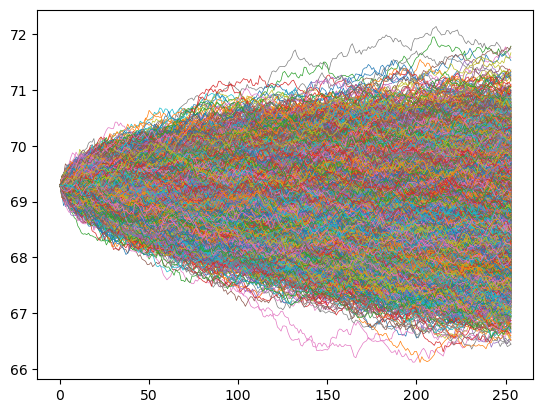

Running time: 11.201610803604126 seconds


In [171]:
import time
start = time.time()
# Simulation
paths = []
for i in range(I):
    level = ou(length, K, alpha, t, dt, SIGMA)
    paths.append(level)
# Paths has 10000 entries, each has 254 steps

np.shape(np.asarray(paths).T)

# Compute tranpose for plotting purposes
paths = np.asarray(paths)
paths = paths.T

# Compute the exponential of paths, since X = ln(S)
S_new_paths = np.exp(paths)
plt.plot(S_new_paths, lw= 0.5 )
plt.show()
print("Running time: %s seconds" % (time.time()-start))

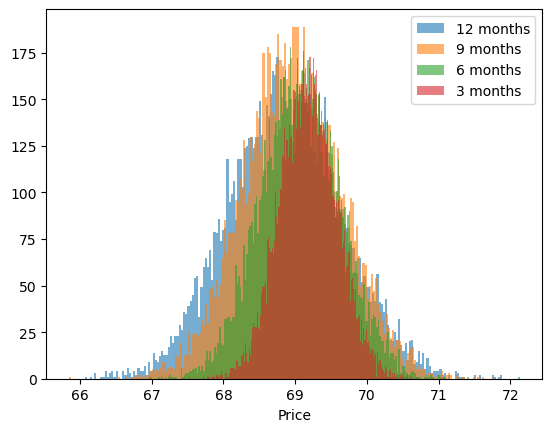

In [ ]:
# Check distribution of generated prices
import seaborn
df = pd.DataFrame(S_new_paths)

plt.hist(df.iloc[253, :], bins = 200, alpha=0.6, label = "12 months")
plt.hist(df.iloc[190, :], bins = 200, alpha=0.6, label = "9 months")
plt.hist(df.iloc[126, :], bins = 200, alpha=0.6, label = "6 months")
plt.hist(df.iloc[63, :], bins = 200, alpha=0.6, label = "3 months")

plt.xlabel("Price")
plt.legend()
plt.show()

# Within 3 months the price is generally between 68 and 70 dollars, grows at later t

#### Similar way to compute it, less lines of code but higher time complexity

The solution to the OU SDE can be discretized as

\begin{align}
X_{t+1} = X_{t}*e^{-kΔt} + α^*(1-e^{-kΔt}) + \sqrt{\frac{σ^2}{2k}(1-𝑒^{-2kΔt})}e_{t}
\end{align}

where $e_t ∼ N(0,1)$.

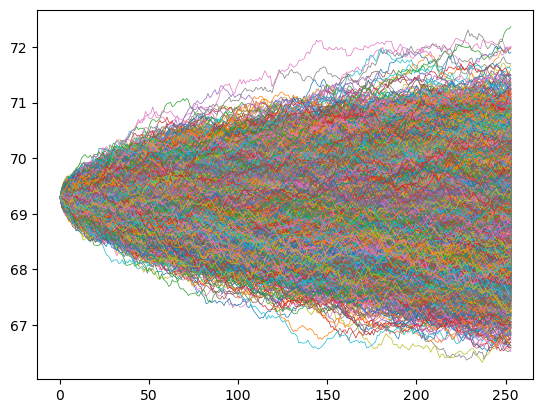

Running time: 37.4527862071991 seconds


In [ ]:
star = time.time()
I = 10000
X_t = np.zeros((length, I))
X_t[0, :] = y0

std_term = np.sqrt((SIGMA**2)/(2*K) * (1 - np.exp(-2*K*dt)))
BM = np.random.normal(loc = 0, scale = 1, size = (length, I))

for t in range(1, length):
    X_t[t, :] = X_t[t-1, :]*np.exp(-K*dt) + alpha*(1-np.exp(-K*dt)) + std_term * BM[t, :]

S_t = np.exp(X_t)
plt.plot(S_t, lw = 0.5)
plt.show()

print("Running time: %s seconds" % (time.time()-start))

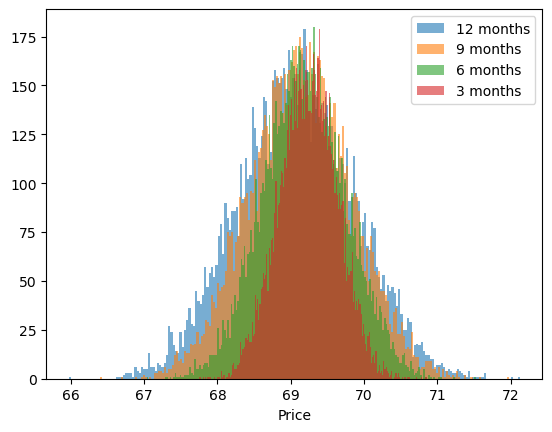

In [161]:
# Check distribution of generated prices
import seaborn
import pandas as pd
df = pd.DataFrame(S_t)

plt.hist(df.iloc[253, :], bins = 200, alpha=0.6, label = "12 months")
plt.hist(df.iloc[190, :], bins = 200, alpha=0.6, label = "9 months")
plt.hist(df.iloc[126, :], bins = 200, alpha=0.6, label = "6 months")
plt.hist(df.iloc[63, :], bins = 200, alpha=0.6, label = "3 months")

plt.xlabel("Price")
plt.legend()
plt.show()

In [158]:
y0

4.23830059563929